# 데이터 전처리 과정

### Import modules

In [470]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('mode.chained_assignment',  None)

### Open data and Indexing

In [471]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

total = train.append(test)
columns_replace = {
    'PassengerId':'Id',
    'Embarked':'Emb',
    'Sex':'Gender',
              }
total = total.rename(columns=columns_replace).set_index("Id")
print("Dataset complete!")

Dataset complete!


### Read Data Properly

In [472]:
total.head(3)

,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Emb
Id,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [473]:
total.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [474]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Gender    1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Emb       1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


for a in total.columns:
    print("----------------------------")
    print(total[a].value_counts())
    print(total[a].value_counts().sum())   
    print("----------------------------")

#showing columns include null value
filtered_cols = [a for a in total.columns if total[a].isnull().sum() != 0]
for a in filtered_cols:
    print('----------------------------------')    
    print(a)
    print(total[a].value_counts())
    print(total[a].value_counts().sum())    
    print('----------------------------------')

In [475]:
str_cols = [a for a in total.columns if total.dtypes[a] == 'object']
int_cols = [b for b in total.columns if total.dtypes[b] != 'object']


def bar_chart(feature):
    survived = total[total['Survived']==1][feature].value_counts()
    dead = total[total['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived','dead']
    df.plot(kind='bar', stacked=True)
    plt.title(feature)


def pie_chart(feature, surv = True):
    survived = total[total['Survived']==1][feature].value_counts()
    dead = total[total['Survived']==0][feature].value_counts()
    if surv:
        plt.pie(survived, autopct='%.1f')
    else:
        plt.pie(dead, autopct='%.1f')
    plt.show()

# Data Preprocessing
## Pclass : one-hot

In [476]:
print(total['Pclass'].value_counts())
print('Null count :', total['Pclass'].isnull().sum())

3    709
1    323
2    277
Name: Pclass, dtype: int64
Null count : 0


In [477]:
class_mapping = {
    1:'1st',
    2:'2nd',
    3:'3rd',
}
total['Pclass'] = total['Pclass'].map(class_mapping)

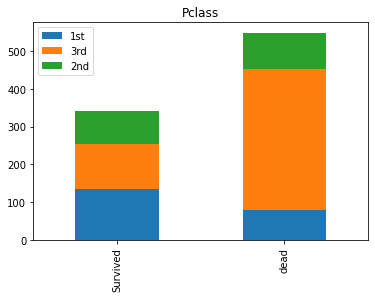

In [478]:
bar_chart('Pclass')

## Name : one-hot

In [479]:
total['Name'] = total['Name'].str.split('.').str[0].str.split(', ').str[1]

In [480]:
total['Name'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Lady              1
Dona              1
Don               1
Jonkheer          1
the Countess      1
Mme               1
Capt              1
Sir               1
Name: Name, dtype: int64

In [481]:
name_mapping = {
    'Mr':'Mr',
'Miss':'Miss',
'Mrs':'Mrs',
'Master':'Master',
'Dr':'Others',
'Rev':'Others',
'Col':'Others',
'Mlle':'Miss',
'Major':'Others',
'Ms':'Mrs',
'the Countess':'Others',
'Jonkheer':'Others',
'Capt':'Others',
'Dona':'Others',
'Sir':'Others',
'Lady':'Others',
'Mme':'Miss',
'Don':'Others',
}

total['Name'] = total['Name'].map(name_mapping)

In [482]:
total['Name'].groupby(total['Survived']).value_counts(sort=False)

Survived  Name  
0.0       Master     17
          Miss       55
          Mr        436
          Mrs        26
          Others     15
1.0       Master     23
          Miss      130
          Mr         81
          Mrs       100
          Others      8
Name: Name, dtype: int64

In [483]:
total['Name'].value_counts()

Mr        757
Miss      263
Mrs       199
Master     61
Others     29
Name: Name, dtype: int64

## Gender (complete)

In [484]:
print(total['Gender'].value_counts())
print('Null count :', total['Gender'].isnull().sum())

male      843
female    466
Name: Gender, dtype: int64
Null count : 0


In [485]:
gender_mapping = {
    'male':0,
    'female':1,
}


total['Gender'] = total['Gender'].map(gender_mapping)

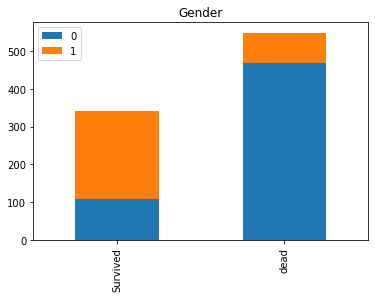

In [486]:
bar_chart('Gender')

## Age (complete)

In [487]:
print(total['Age'].value_counts())
print('Null count :', total['Age'].isnull().sum())

24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
20.50     1
11.50     1
22.50     1
0.33      1
60.50     1
Name: Age, Length: 98, dtype: int64
Null count : 263


In [488]:
total['Age'] = total.groupby(['Gender','Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))

In [489]:
total['Age'].loc[total['Age']<=10] = 0
total['Age'].loc[(total['Age']>10) & (total['Age']<= 20)]=1
total['Age'].loc[(total['Age']>20) & (total['Age']<= 30)]=2
total['Age'].loc[(total['Age']>30) & (total['Age']<= 40)]=3
total['Age'].loc[(total['Age']>40) & (total['Age']<= 50)]=4
total['Age'].loc[(total['Age']>50) & (total['Age']<= 60)]=5
total['Age'].loc[(total['Age']>60)]=6


In [490]:
total['Age'].value_counts()

2.0    585
3.0    221
1.0    162
4.0    160
0.0     86
5.0     62
6.0     33
Name: Age, dtype: int64

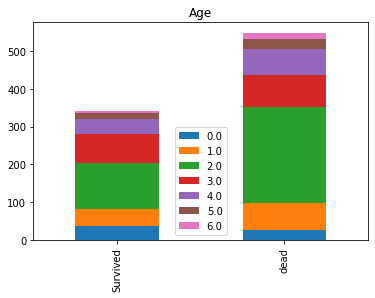

In [491]:
bar_chart('Age')

In [492]:
print('Null count :', total['Age'].isnull().sum())

Null count : 0


## Ticket (X)

In [493]:
print('Null count :', total['Ticket'].isnull().sum())

Null count : 0


In [494]:
total['Ticket'] = total.groupby('Ticket')['Ticket'].transform('count')

## Family ( = SibSp + Parch) (complete)

In [495]:
total['Family'] = total["SibSp"] + total["Parch"] + 1
total= total.drop(['SibSp','Parch'], axis = 1)

print(total['Family'].value_counts())
print('Null count :', total['Family'].isnull().sum())

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family, dtype: int64
Null count : 0


In [496]:
total['Family'].groupby(total['Survived']).value_counts(sort=False)

Survived  Family
0.0       1         374
          2          72
          3          43
          4           8
          5          12
          6          19
          7           8
          8           6
          11          7
1.0       1         163
          2          89
          3          59
          4          21
          5           3
          6           3
          7           4
Name: Family, dtype: int64

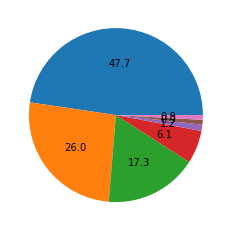

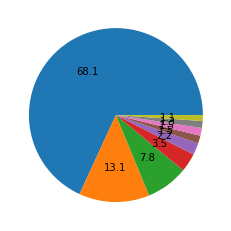

In [497]:
pie_chart("Family")
pie_chart("Family", False)

## Fare (complete?)

In [498]:
print('Null count :', total['Fare'].isnull().sum())

Null count : 1


In [499]:
Fare_null = total['Fare'][(total['Gender']==0) & (total['Pclass'] == '3rd') & (total['Family']==1)].mean()

In [500]:
total[total['Fare'].isnull()]

,Survived,Pclass,Name,Gender,Age,Ticket,Fare,Cabin,Emb,Family
Id,,,,,,,,,,
1044,NaN,3rd,Mr,0,6.0,1,NaN,NaN,S,1


In [501]:
total['Fare'].fillna(Fare_null, inplace = True)

In [502]:
total['Fare'] = pd.qcut(total['Fare'], 13, False)

In [503]:
total['Fare'].value_counts()

2     127
0     117
4     109
8     109
10    104
7     101
12    100
11     98
1      93
5      92
9      91
3      84
6      84
Name: Fare, dtype: int64

## Cabin : one-hot (complete)

In [504]:
print('Null count :', total['Cabin'].isnull().sum())

Null count : 1014


In [505]:
total['Cabin'] = total['Cabin'].str[0]

In [506]:
total['Cabin'].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin, dtype: int64

In [507]:
total[(total['Cabin']=='A')].sort_values('Pclass')

,Survived,Pclass,Name,Gender,Age,Ticket,Fare,Cabin,Emb,Family
Id,,,,,,,,,,
24,1.0,1st,Mr,0,2.0,1,10,A,S,1
1185,NaN,1st,Others,0,5.0,3,11,A,S,3
1100,NaN,1st,Miss,1,3.0,1,9,A,C,1
1004,NaN,1st,Miss,1,3.0,1,9,A,C,1
938,NaN,1st,Mr,0,4.0,1,9,A,C,1
920,NaN,1st,Mr,0,4.0,1,9,A,S,1
868,0.0,1st,Mr,0,3.0,1,10,A,S,1
807,0.0,1st,Mr,0,3.0,1,0,A,S,1
648,1.0,1st,Others,0,5.0,1,10,A,C,1


In [508]:
total['Cabin'][total['Cabin']=='T'] = 'A'

In [509]:
total['Cabin'] = total['Cabin'].fillna('N')

In [510]:
total['Cabin'].value_counts()

N    1014
C      94
B      65
D      46
E      41
A      23
F      21
G       5
Name: Cabin, dtype: int64

## Emb :one-hot

In [511]:
print(total['Emb'].value_counts())
print('Null count :', total['Emb'].isnull().sum())
total['Emb'].mode()[0]

S    914
C    270
Q    123
Name: Emb, dtype: int64
Null count : 2


'S'

In [512]:
total['Emb'] = total['Emb'].fillna(total['Emb'].mode()[0])
total['Emb'].isnull().sum()

0

### END

In [513]:
total.isnull().sum()

Survived    418
Pclass        0
Name          0
Gender        0
Age           0
Ticket        0
Fare          0
Cabin         0
Emb           0
Family        0
dtype: int64

### data split and get dummies

In [514]:
onehot_feature = ['Pclass','Name','Cabin','Emb']
numeric_feature = ['Gender','Age','Ticket','Fare','Family','Survived']
onehot_total = pd.get_dummies(total[onehot_feature])
numeric_total = total[numeric_feature]
onehot_total

,Pclass_1st,Pclass_2nd,Pclass_3rd,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Others,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Emb_C,Emb_Q,Emb_S
Id,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
5,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1306,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1307,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1


In [515]:
scaled_total = pd.concat([numeric_total,onehot_total],axis=1)
scaled_total

,Gender,Age,Ticket,Fare,Family,Survived,Pclass_1st,Pclass_2nd,Pclass_3rd,Name_Master,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Emb_C,Emb_Q,Emb_S
Id,,,,,,,,,,,,,,,,,,,,,
1,0,2.0,1,0,2,0.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,1,3.0,2,11,2,1.0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,2.0,1,3,1,1.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,1,3.0,2,10,2,1.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5,0,3.0,1,3,1,0.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,2.0,1,3,1,NaN,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1306,1,3.0,3,12,1,NaN,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1307,0,3.0,1,0,1,NaN,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [516]:
#data split

scaled_train = scaled_total[scaled_total["Survived"].notnull()].drop('Survived',axis=1)
scaled_test = scaled_total[scaled_total["Survived"].isnull()].drop('Survived',axis=1)
scaled_train_y = scaled_total[scaled_total["Survived"].notnull()]['Survived']

In [539]:
scaled_train.head()

,Gender,Age,Ticket,Fare,Family,Pclass_1st,Pclass_2nd,Pclass_3rd,Name_Master,Name_Miss,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Emb_C,Emb_Q,Emb_S
Id,,,,,,,,,,,,,,,,,,,,,
1,0,2.0,1,0,2,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,3.0,2,11,2,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,2.0,1,3,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
4,1,3.0,2,10,2,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5,0,3.0,1,3,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


# Scale

In [540]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_train = ss.fit_transform(scaled_train)
scaled_test = ss.fit_transform(scaled_test)

# Model

In [541]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as tts

x1, x2, y1, y2 = tts(scaled_train, scaled_train_y, test_size = 0.15, random_state = 11)

In [542]:
n_esti = [10*a for a in range(1,9)]
dpth = [b for b in range(1,5)]
scores = []
for a in n_esti:
    for b in dpth:
        rfc = RandomForestClassifier(n_estimators=a, max_depth=b, random_state=11)
        rfc.fit(x1,y1)
        scores.append((rfc.score(x2, y2),a,b))
sorted(scores)

[(0.7985074626865671, 20, 1),
 (0.7985074626865671, 30, 1),
 (0.8134328358208955, 80, 1),
 (0.8208955223880597, 40, 1),
 (0.8283582089552238, 60, 1),
 (0.8283582089552238, 70, 1),
 (0.835820895522388, 10, 2),
 (0.835820895522388, 30, 2),
 (0.8432835820895522, 10, 1),
 (0.8507462686567164, 20, 2),
 (0.8507462686567164, 40, 2),
 (0.8507462686567164, 50, 1),
 (0.8582089552238806, 50, 2),
 (0.8656716417910447, 10, 3),
 (0.8656716417910447, 70, 2),
 (0.8731343283582089, 10, 4),
 (0.8731343283582089, 30, 4),
 (0.8731343283582089, 40, 4),
 (0.8731343283582089, 50, 4),
 (0.8731343283582089, 60, 2),
 (0.8731343283582089, 60, 4),
 (0.8731343283582089, 70, 4),
 (0.8731343283582089, 80, 4),
 (0.8805970149253731, 20, 3),
 (0.8805970149253731, 20, 4),
 (0.8805970149253731, 30, 3),
 (0.8805970149253731, 80, 2),
 (0.8880597014925373, 40, 3),
 (0.8880597014925373, 70, 3),
 (0.8880597014925373, 80, 3),
 (0.8955223880597015, 50, 3),
 (0.8955223880597015, 60, 3)]

In [553]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=11)
rfc.fit(scaled_train,scaled_train_y)
test_surv = rfc.predict(scaled_test)

In [561]:
submission_df = pd.DataFrame(columns=['PassengerId','Survived'])
submission_df['PassengerId'] = test['PassengerId']
submission_df['Survived'] = test_surv.astype(int)
submission_df.to_csv('LambFerret_submission.csv', header=True, index=False)

In [559]:
submission_df

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0
